# Project: Investigations on hyperinflations and socio-economical correlations
Author: Dennis Dachkovski

## Table of Contents
<ul>
<li><a href="#intro">Business Understanding</a></li>
<li><a href="#data">Data Understanding</a></li>
<li><a href="#wrangling">Data Preparation</a></li>
<li><a href="#eda">Data Modeling</a></li>
<li><a href="#conclusions">Results</a></li>
</ul>

<a id='intro'></a>
## Introduction

The  coronavirus pandemic forces central banks into overdrive in order to minimize damage to the economies. One of their measures to regulate the price stability of their currency in the economies are discount rate adjustments. The reduction of interest rates lowers costs to overnight borrowing for banks, which in return is used to generate more credit in the fractional reserve banking system. Opinions appear that this crisis may cause hyperinflations in some countries. 

> **Hyperinflation**: In phases of stress to the government budget, such as wars, sociopolitical upheavals, or other crises it is difficult for the government to collect tax revenue. 
If coupled with a strong need to maintain government spending, together with an inability to borrow (for instance if the crisis is global), can lead a country into hyperinflation.

Therefore, this report invastigates historic hyperinflations and their socio-economic correlations based on datasets available at Gapminder.

> **Gapminder**: "Gapminder is an independent Swedish foundation with no political, religious or economic affiliations. Gapminder is a fact tank, not a think tank. Gapminder fights devastating misconceptions about global development." (Source: https://www.gapminder.org/about-gapminder/)

The goal is to summarize historical hyperinflations, to visualize correlations with socio-economical data and generate insights to register a potentially incoming currency crisis in early stages. 

This analysis includes hyperinflations from different countries and the corresponding reaction of the central bank discount rate during the currency crisis. Furthermore, correlations to population growth, real wages, unemployment rate, social inequality, market capitalization and gross domestic investment are investigated. The results of the analysis do not state or imply that one change causes another based solely on a correlation.

<a id='business'></a>
## Business Understanding


The report will answer the following questions:
1. When and where did the biggest hyperinflations occur from 1961 to 2017 in each of the countries and how did the central bank discount rate change around that time ?

5. What are the correlations between inflation and 
    a) population growth, 
    b) real income, 
    d) inequality?
    
3. Are there global trends in central bank discount rate policy?

<a id='data'></a>
## Data Understanding

- **Name:** Aged 15+ unemployment rate (%)<br>
- **Description:** Percentage of total population, age group above 15, that has been registered as unemployed during the given year.
- **Source:** https://www.ilo.org/ilostat/<br>


- **Name:** Central bank discount rate (annual %)<br>
- **Description:** Central bank discount rate (annual %) 
- **Source:** https://data.un.org/<br>


- **Name:** GINI coefficient<br>
- **Description:** Gini shows income inequality in a society. A higher number means more inequality. 
- **Source:** http://gapm.io/ddgini<br>


- **Name:** Income per person (GDP/capita, PPP$ inflation-adjusted)<br>
- **Description:** Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).<br>
- **Source:** http://gapm.io/dgdppc<br>


- **Name:** Inflation (annual %)<br>
- **Description:** Inflation as measured by the annual growth rate of the GDP implicit deflator shows the rate of price change in the economy as a whole. The GDP implicit deflator is the ratio of GDP in current local currency to GDP in constant local currency.
- **Source:** https://data.worldbank.org/indicator/NY.GDP.DEFL.KD.ZG<br>


- **Name:** Market value of listed companies (% of GDP)<br>
- **Description:** Market capitalization (also known as market value) is the share price times the number of shares outstanding (including their several classes) for listed domestic companies. Investment funds, unit trusts, and companies whose only business goal is to hold shares of other listed companies are excluded. Data are end of year values.
- **Source:** https://data.worldbank.org/indicator/CM.MKT.LCAP.GD.ZS<br>


- **Name:** Population growth (annual %)<br>
- **Description:** Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. 
- **Source:** https://data.worldbank.org/indicator/SP.POP.GROW<br>


- **Name:** Investments (% of GDP)<br>
- **Description:** Gross capital formation (formerly gross domestic investment) consists of outlays on additions to the fixed assets of the economy plus net changes in the level of inventories. Fixed assets include land improvements (fences, ditches, drains, and so on); plant, machinery, and equipment purchases; and the construction of roads, railways, and the like, including schools, offices, hospitals, private residential dwellings, and commercial and industrial buildings. Inventories are stocks of goods held by firms to meet temporary or unexpected fluctuations in production or sales, and "work in progress." According to the 1993 SNA, net acquisitions of valuables are also considered capital formation.

- **Source:** https://data.worldbank.org/indicator/NE.GDI.TOTL.ZS<br>





<a id='wrangling'></a>
## Data Preparation

In this section of the report, the data is loaded, checked for structure and cleanliness, and trimmed for analysis.


### General Properties

First the packages required for the analysis are loaded. In order to plot the vizualisations within the jypither notebook a so called 'magic word' is used.

In [80]:
# import statements for all of the needed packages

import numpy as np # fast array handling
import pandas as pd # data analysis library
import matplotlib.pyplot as plt # plot library
import seaborn as sns # plot library with statistical parameters 
import scipy.stats as stats # pearson correlation coefficient
import statsmodels.api as sms # linear fit
from functools import reduce # combining pandas dataframes 
from datetime import datetime, timedelta # converting strings to datetime format
from IPython.display import HTML # print dataframes

# 'magic word' so that the visualizations are plotted inline with the notebook

%matplotlib inline 

The next step is to access the data as csv-files and load it into pandas dataframes.

In [2]:
# leading .csv files into pandas dataframes

df_inco = pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv') # real income per person
df_unem = pd.read_csv('data/aged_15plus_unemployment_rate_percent.csv') # unemployment rates
df_infl = pd.read_csv('data/inflation_annual_percent.csv') # inflation rates
df_pgro = pd.read_csv('data/population_growth_annual_percent.csv') # population growth rates
df_cbdr = pd.read_csv('data/central_bank_discount_rate_annual_percent.csv') # central bank discount rates
df_gini = pd.read_csv('data/gini.csv') # GINI coefficient as measure for inequality 
df_maca = pd.read_csv('data/market_value_of_listed_companies_percent_of_gdp.csv') # market capitalization 
df_inve = pd.read_csv('data/investments_percent_of_gdp.csv') # investment rate
df_tgdp = pd.read_csv('data/total_gdp_ppp_inflation_adjusted.csv') # total GDP

The format of the files is the same. By printing out a few lines of, we can inspect the format of the data. 

In [3]:
df_infl.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.18,-2.11000,9.44,10.60,8.30,3.88000,0.596,2.430,5.120,4.87
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.63,2.42000,4.49,2.31,1.04,0.29000,1.550,0.564,-0.481,1.37
2,Algeria,3.47,2.35,0.549,1.7,1.5,1.82,1.31,3.14,1.92,...,15.40,-11.20000,16.10,18.20,7.48,-0.06180,-0.290,-6.570,0.890,6.80
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.98,-0.00001,1.60,2.50,1.10,0.00036,-0.100,-0.455,0.700,0.90
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.70,-7.42000,22.40,24.10,5.73,3.75000,-1.310,-3.980,27.700,31.10


The shape of the data is well suited to compare the variables between countries at a certain year. What we want is to analyse time series and aggregating over countries, in order to find global trends. Therefore, a transformation of the shape is needed, so that each year will be in an own row. This way, the dataframe can be easily sorted by the country and year.

What is more, the data is incomplete and may start at different years. To check that, we print the shapes of the dataframes:

In [4]:
# view dimensions of dataset

print(
    " income:", df_inco.shape,
    "\n unemployment:", df_unem.shape,
    "\n inflation:", df_infl.shape,
    "\n population growth:", df_pgro.shape,
    "\n central bank discount rate:", df_cbdr.shape,
    "\n GINI:", df_gini.shape,
    "\n market capitalisation:", df_maca.shape,
    "\n investment rates:",  df_inve.shape,
    "\n total GDP:",  df_tgdp.shape
)

 income: (193, 242) 
 unemployment: (186, 72) 
 inflation: (193, 58) 
 population growth: (194, 59) 
 central bank discount rate: (141, 60) 
 GINI: (195, 242) 
 market capitalisation: (92, 44) 
 investment rates: (177, 59) 
 total GDP: (194, 215)


As assumed, the dataframes differs in both dimensions, countries and years. Which means not all countries are present in each data set and not every country has the same time frames. This has to be considered in the further analysis.


### Data Shaping and Cleaning
The next steps aim to reshape the data in a structure, where the years are in one column. For that, we define a function, that will do that for every source dataframe. After changing the structure of the data, any problems that need to be cleaned, are performed in the second part of this section.

In [5]:
# function to reshape into a more task suited form using melt function

def df_reshape(df, value_name):
    df = pd.melt(df, id_vars = ["country"], var_name = "year", value_name = value_name) 
    df.sort_values(["country", "year"], inplace = True)
    return df

The previous function is called for every dataframe:

In [6]:
df_cbdr_T = df_reshape(df_cbdr, "central_bank_discount_rate")
df_unem_T = df_reshape(df_unem, "unemployment_rate")
df_infl_T = df_reshape(df_infl, "inflation")
df_pgro_T = df_reshape(df_pgro, "population_growth")
df_gini_T = df_reshape(df_gini, "gini")
df_inco_T = df_reshape(df_inco, "income_per_person")
df_maca_T = df_reshape(df_maca, "market_value")
df_inve_T = df_reshape(df_inve, "investments")
df_tgdp_T = df_reshape(df_tgdp, "total_gdp")

Let's check, whether the new format matches our expectations:

In [7]:
df_infl_T.head(1)

,country,year,inflation
0,Afghanistan,1961,NaN


The format is now as needed, but it is quity unhandy to operate with 8 different dataframes. Thus, we merge them into one dataframe with the 'merge'-function. As some of the dataframes have missing values, an outer join is used. This way, no data is lost, that might be necessary from some of the other columns.

In [8]:
# bundling dataframes into one list
dfs = [df_cbdr_T, df_unem_T, df_infl_T, df_pgro_T, df_gini_T, df_inco_T, df_maca_T, df_inve_T, df_tgdp_T] 

# reduce() function accepts a function and a sequence and returns a single value calculated
df_final = reduce(lambda left,right: pd.merge(left,right, how='outer', on=['year', 'country']), dfs) 

# this step is necessary for a later calculation in question 3 and will explained at a later step
df_q3 = df_final[['year','central_bank_discount_rate']].copy() 

In [9]:
df_final.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,market_value,investments,total_gdp
0,Albania,1948,NaN,NaN,NaN,NaN,26.5,1770.0,NaN,NaN,2.390000e+09
1,Albania,1949,NaN,NaN,NaN,NaN,26.5,1780.0,NaN,NaN,2.440000e+09
2,Albania,1950,NaN,NaN,NaN,NaN,26.6,1780.0,NaN,NaN,2.460000e+09
3,Albania,1951,NaN,NaN,NaN,NaN,26.6,1860.0,NaN,NaN,2.620000e+09
4,Albania,1952,NaN,NaN,NaN,NaN,26.6,1860.0,NaN,NaN,2.680000e+09


Now having consolidated the data in a suitable format in one dateframe, the next steps are to check the amout of missing values, the datatypes and for duplicates.

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46995 entries, 0 to 46994
Data columns (total 11 columns):
country                       46995 non-null object
year                          46995 non-null object
central_bank_discount_rate    4566 non-null float64
unemployment_rate             3028 non-null float64
inflation                     8535 non-null float64
population_growth             11178 non-null float64
gini                          46995 non-null float64
income_per_person             46513 non-null float64
market_value                  2027 non-null float64
investments                   7496 non-null float64
total_gdp                     41474 non-null float64
dtypes: float64(9), object(2)
memory usage: 4.3+ MB


All datatypes are suitable, exept 'year', which is an string object. Thus we will need to convert it into a datetime object.

In [11]:
# fix data type: year to datetime
df_final['year'] = df_final['year'].apply(lambda x: datetime.strptime(x, '%Y'))

Done that, we can check for duplicates:

In [12]:
# check for duplicates
df_final.duplicated().sum()

0

Furthunately there are no duplicates in the dataframe. We can continue to analyse which column has missing data and how much values are missing.

In [13]:
# count NaNs
df_final.isna().sum() 

country                           0
year                              0
central_bank_discount_rate    42429
unemployment_rate             43967
inflation                     38460
population_growth             35817
gini                              0
income_per_person               482
market_value                  44968
investments                   39499
total_gdp                      5521
dtype: int64

Almost all of the columns have different amouts of missing values. At this point we could drop all the rows where the inflation has missing values, as our goal is to compare inflation to the other parameters. But this would require to drop the NaNs of the other variables at later stages one more time, as we dont know how they are distributed. Therefore, we will not do that at this stage and wait until the relevant columns are defined.

<a id='eda'></a>
## Exploratory Data Analysis and Data Modelling

Now that the data is trimmed, we move on to exploration. We will use statistical analysis and create visualizations with the goal of addressing the research questions that were posed in the Introduction section.

### Research Question 1: When and where did the biggest hyperinflations occur from 1961 to 2017?
In order to find hyperinflations, we first have a look at the original inflation dataframe by plotting the inflation rates in a heatmap.

In [14]:
df_infl = df_infl.set_index('country')

In [15]:
df_infl = df_infl.dropna()

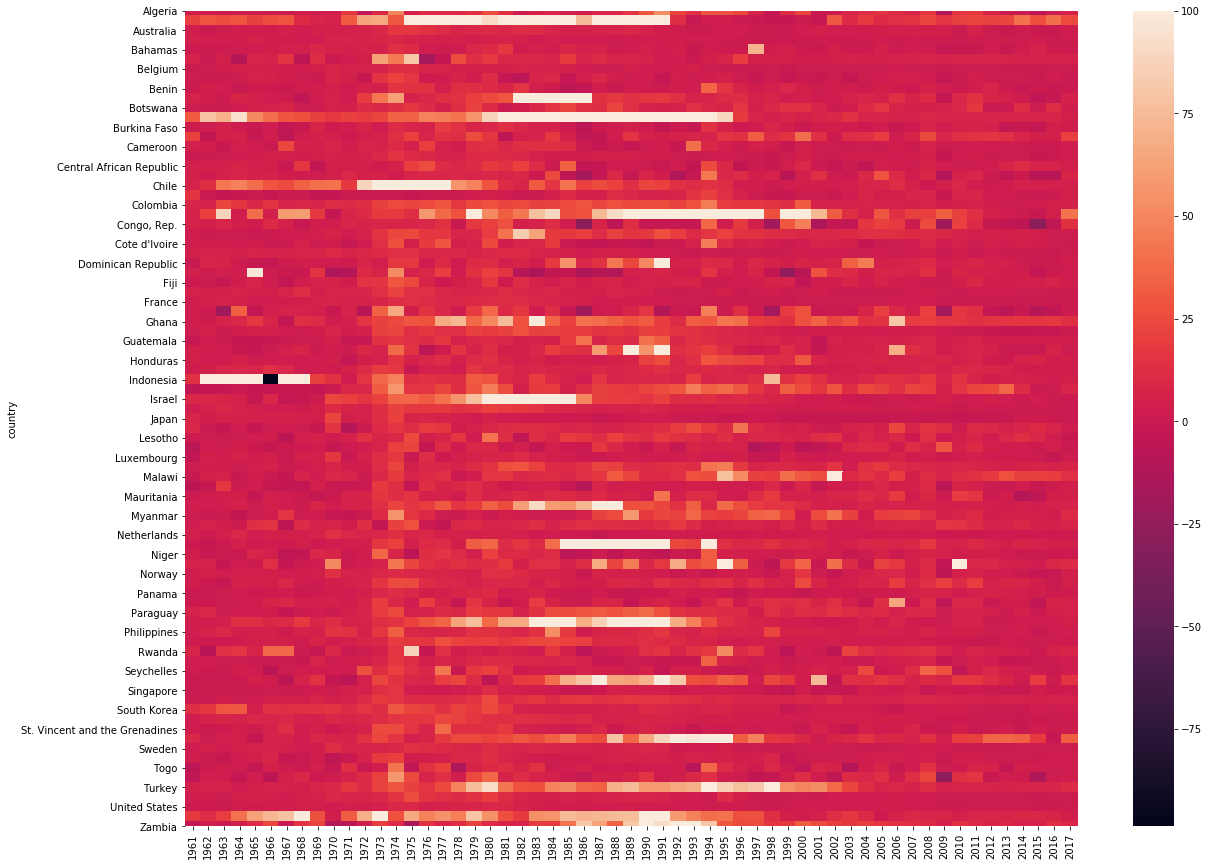

In [16]:
plt.subplots(figsize=(20, 15))
sns.heatmap(df_infl, vmax=100.0);

In order to find the peaks of these hyperinflations, we have to query the dataframe for high inflation values. There are different definitions, when to consider an inflation rate a "hyperinflation". For simplicity, I have chosen an annual inflation of more than 100%.

In [17]:
# Querying dataframe for rows with an inflation rate higher than 100
df_hyper = df_final.query('inflation > 100')

The next step is to extract the relevant columns, which are country, year and inflation. The resulting dataframe is then grouped by country, to find the maximum inflation for each country.

In [18]:
# new dataframe with year, country, inflation
countries_hyper = df_hyper.loc[:, ['country','year', 'inflation']] 

# create boolean index, where inflation is maximum
index = countries_hyper.groupby(['country'])['inflation'].transform(max) == countries_hyper['inflation'] 

# save only maximum inflation rows
countries_hyper = countries_hyper[index] 
countries_hyper_html = HTML(countries_hyper.to_html(index=False))
countries_hyper_html

country,year,inflation
Albania,1992-01-01,250.0
Angola,1996-01-01,4800.0
Armenia,1994-01-01,4110.0
Azerbaijan,1994-01-01,1390.0
Belarus,1994-01-01,1950.0
Bolivia,1985-01-01,12300.0
Brazil,1990-01-01,2700.0
Bulgaria,1997-01-01,959.0
Chile,1974-01-01,679.0
"Congo, Dem. Rep.",1994-01-01,26800.0


The resulting dataframe contains the biggest hyperinflations for each country.

### Research Question 2: How did the central bank discount rate change around that time in each of the countries?

To answer this question, we need to add a time intervals around the hyperinflation times from the previous result. 
Nevertheless, we have to consider, that the central bank discount rate has missing values compared to the inflation column. That means we cannot plot complete lines for the central bank discount rate together with the inflation rates for all the countries. 

In [19]:
df_hyper.loc[:, ['country', 'year', 'inflation', 'central_bank_discount_rate']].isna().sum()

country                         0
year                            0
inflation                       0
central_bank_discount_rate    118
dtype: int64

In order to create the time intervall around the hyperinflation peaks, we loop through the hyperinflation dataframe and use the year for a second loop, where the time column is extended. To be more specific, we subtract 10 years (3650 days, as the timedelta function doesn't accept years) for the lower boundary and add 20 years for the upper boundary, resulting in a time box of 20 years for each hyperinflation. 

In [147]:
# init dataframe
df_hyper_time = pd.DataFrame(columns=df_final.columns)

# looping through countries_hyper and extract country and year
for country, year in zip(countries_hyper.country, countries_hyper.year):
    
    # the secound loop iterates through a list of years starting 10 years before and ends 10 years after hyperinflation
    for year_2 in pd.date_range(start=year - timedelta(days=3650), periods=20, freq='YS'):
        
        # querying the complete dataframe with those additional years 
        df = df_final.query('country == "{}" & year == "{}"'.format(country,year_2))
        
        # appending the additional data points from the main dataframe to the hyperinflation dataframe
        df_hyper_time = df_hyper_time.append(df, ignore_index=True, sort=False)
        
df_hyper_time.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,market_value,investments,total_gdp
0,Albania,1983-01-01,NaN,NaN,-0.01680,2.12,26.9,4260.0,NaN,36.1,1.360000e+10
1,Albania,1984-01-01,NaN,NaN,-0.02840,2.10,26.9,4280.0,NaN,31.8,1.400000e+10
2,Albania,1985-01-01,NaN,NaN,0.35100,2.06,26.9,4300.0,NaN,32.8,1.440000e+10
3,Albania,1986-01-01,NaN,NaN,-2.38000,1.93,26.9,4330.0,NaN,30.9,1.490000e+10
4,Albania,1987-01-01,NaN,NaN,0.00003,2.00,26.9,4360.0,NaN,28.4,1.540000e+10


For plotting the hyperinflations for each country, we iterate through the countries in the original countries_hyper dataframe ( as there the country names occur only one time), and query the time enriched **'df_hyper_time'** dataframe with those names. In order to avoid plotting inflations, where there is not enough data for central bank discount rate to plot, we use an if statement, which is only true, when the sum of missing years is less to 5.

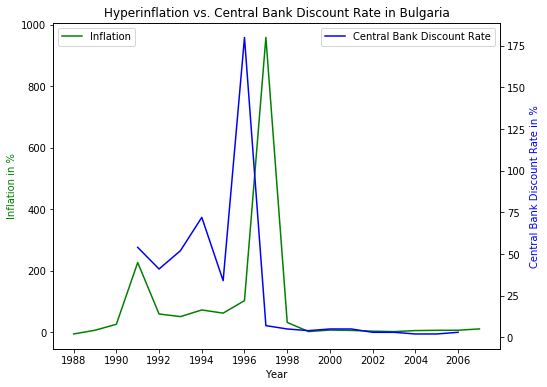

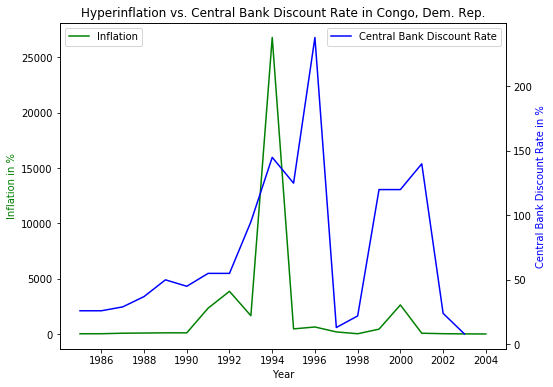

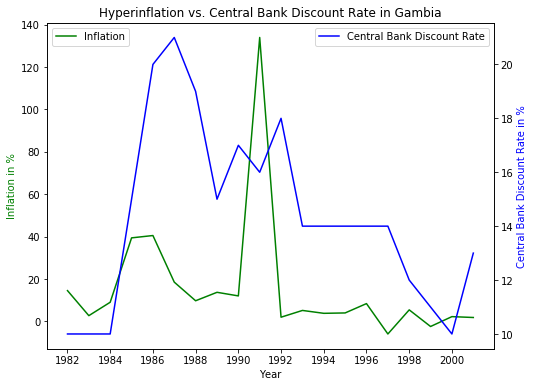

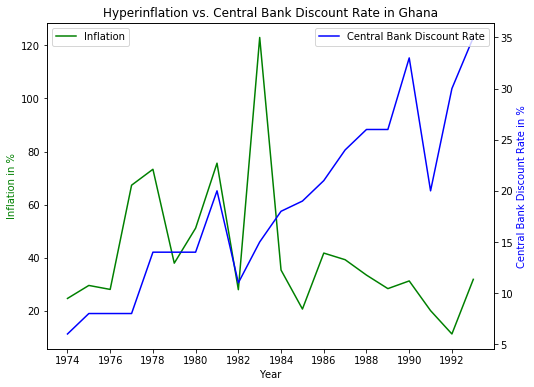

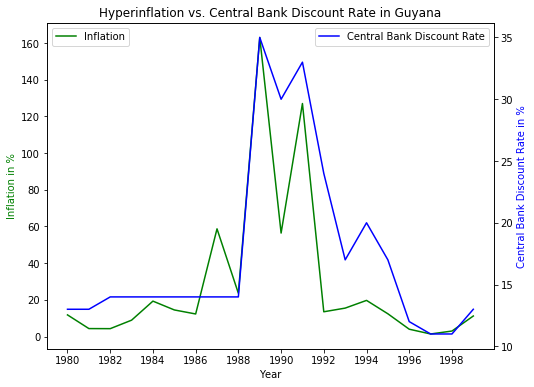

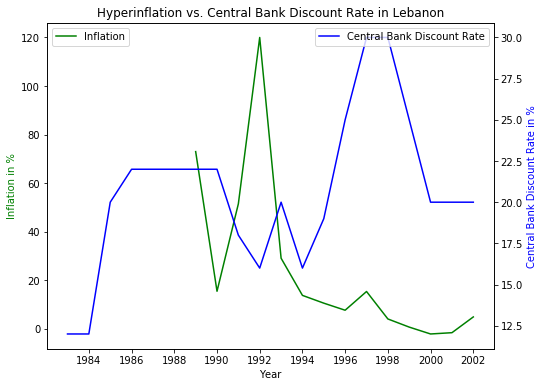

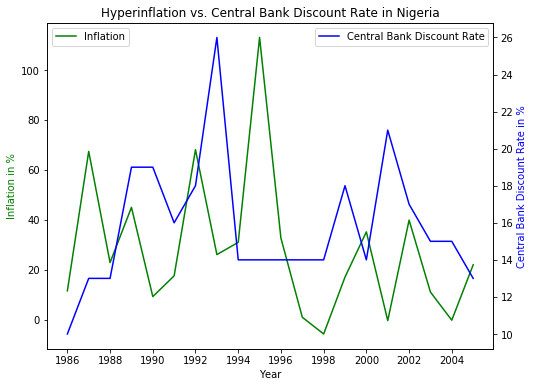

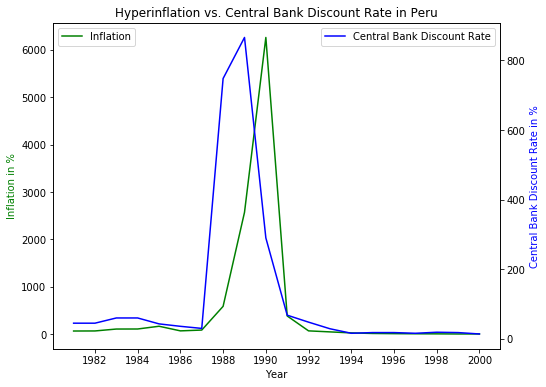

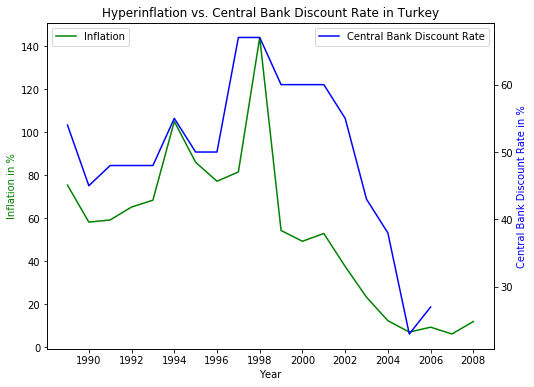

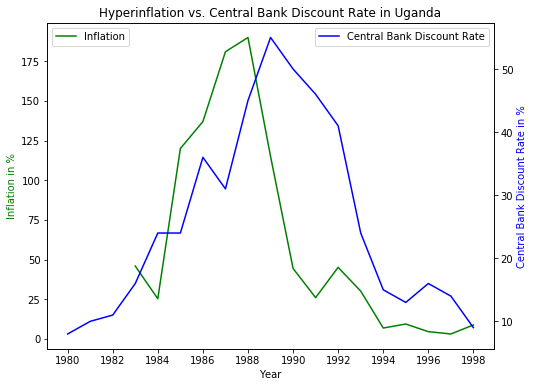

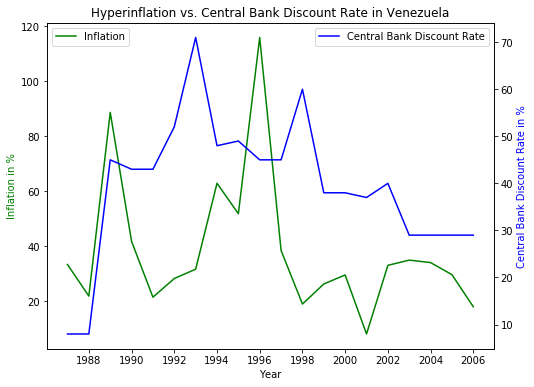

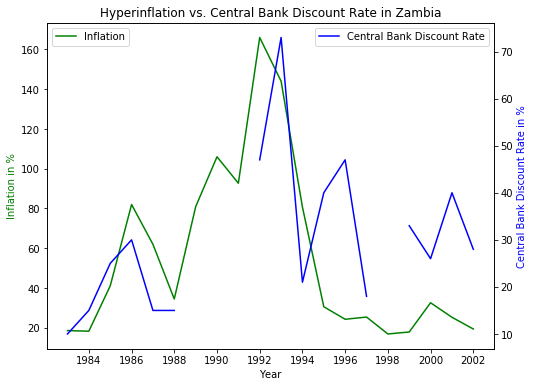

In [82]:
# extracting country names from countries_hyper dataframe
for country in countries_hyper.country:
    
    # querying df_hyper_time with those country names
    df_hyper_time_plot = df_hyper_time.query('country == "{}"'.format(country))
    
    # filtering only subsets with missing values less than 5
    if df_hyper_time_plot['central_bank_discount_rate'].isna().values.sum() < 5:
        
        # assigning the variables
        x = df_hyper_time_plot.year
        y1 = df_hyper_time_plot.inflation
        y2 = df_hyper_time_plot.central_bank_discount_rate
        
        #creating figure for each country
        fig, ax1 = plt.subplots(figsize=(8, 6))
        ax1.set_title('Hyperinflation vs. Central Bank Discount Rate in {}'.format(country))
        ax2 = ax1.twinx()
        line1= ax1.plot(x, y1, color='g')
        line2= ax2.plot(x, y2, color='b')
        ax1.legend(["Inflation"],loc=2)
        ax2.legend(["Central Bank Discount Rate"],loc=1)
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Inflation in %', color='g')
        ax2.set_ylabel('Central Bank Discount Rate in %', color='b')
        plt.show()

It seems that hyperinflations take place relatively fast, which means that a big increase in inflation rates take usually place within one or few years. Furthermore, the central bank discount rate is often following the inflation rate. To check that, we create a scatter plot. To fit the big differences between different inflations, we plot a logarithmic scale:

In [162]:
# drop NaNs from central bank discount rate and inflation
df_cbdr_infl = df_hyper_time[df_hyper_time[['central_bank_discount_rate', 'inflation']].notna().all(1)][['central_bank_discount_rate', 'inflation']]

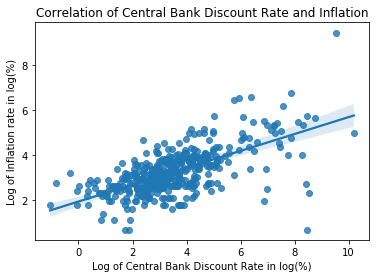

In [163]:
# scatter plot for inflation and central bank discount rate
X = np.log(df_cbdr_infl.inflation)
y = np.log(df_cbdr_infl.central_bank_discount_rate)

f, ax = plt.subplots()
sns.regplot(X,y)

plt.title('Correlation of Central Bank Discount Rate and Inflation')
plt.xlabel('Log of Central Bank Discount Rate in log(%)')
plt.ylabel('Log of Inflation rate in log(%)');

In [172]:
df_cbdr_infl_log = np.log(df_cbdr_infl).dropna()

X = df_cbdr_infl_log.inflation
y = df_cbdr_infl_log.central_bank_discount_rate


lm = sms.OLS(y, X)
results = lm.fit()
results.summary()

/Users/dennis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     central_bank_discount_rate   R-squared (uncentered):                   0.886
Model:                                    OLS   Adj. R-squared (uncentered):              0.886
Method:                         Least Squares   F-statistic:                              3342.
Date:                        Sat, 25 Jul 2020   Prob (F-statistic):                   6.83e-205
Time:                                00:20:45   Log-Likelihood:                         -672.82
No. Observations:                         431   AIC:                                      1348.
Df Residuals:                             430   BIC:                                      1352.
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
inflation      0.8228      0.014     57.813      0.000       0.795       0.851
==============================================================================
Omnibus:                      125.460   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.375
Skew:                          -1.210   Prob(JB):                    5.07e-120
Kurtosis:                       7.974   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The scatter plot shows a strong correlation between inflation rates and central bank inflation rates. Thus we can conclude that a central banks most propably will rise the interest rates when an inflation gets out of control.

### Research Question 3: Are there global trends in central bank discount rate policy?
To answer this question, we need to plot the central banks discount rate for all countries as a scatter plot. As the plot scatter doesn't accept a datatime object as abscissa, we need to come back to the original dataframe, before the 'year' strings where converted into datetime objects. For that we copied in the cleanig process the original dataframe to 'df_q3'. This dataframe is now used to create a scatter plot, by converting the years into integers. 

In [37]:
# converting 'year' strings into integers
df_q3['year'] = df_q3['year'].astype(int)

In [ ]:
df_q3 = df_final.groupby(["year"]).mean().reset_index()

In [ ]:
df_q3 = df_q3[['year','central_bank_discount_rate','inflation']].dropna()

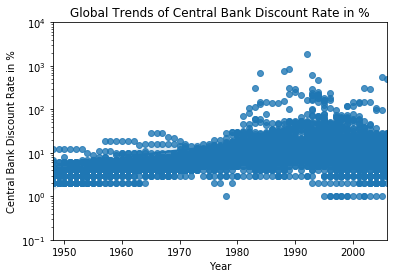

In [174]:
# scatter plot with logarithmic scale for inflation
X = df_q3.year
y = df_q3.central_bank_discount_rate

plt.figure()
plt.plot(X, y)
plt.yscale('log')
#plt.xlim(1950, 2020)
plt.title('Global Trends of Central Bank Discount Rate in %')
plt.xlabel('Year')
plt.ylabel('Central Bank Discount Rate in %');

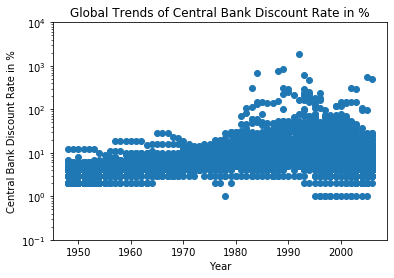

In [38]:
# scatter plot with logarithmic scale for inflation
X = df_q3.year
y = df_q3.inflation.rolling(3).mean()

plt.figure()
plt.plot(X, y)
plt.yscale('log')
#plt.xlim(1950, 2020)
plt.title('Global Trends of Central Bank Discount Rate in %')
plt.xlabel('Year')
plt.ylabel('Central Bank Discount Rate in %');

We can see a accumulation with increasing years, which leads to the conclusion, that hyperinflations became stronger in more recent years. 

### Research Question 4: How did the world population growth during that approximate timeframe?
To answer this question, we have to plot the sum of the population growth over all countries at each year. For doing this, we extract the relevant variables from the main dataframe and drop the null values.

In [39]:
df_plgr = df_final[['year','population_growth']].dropna()

The next step is to group the dataframe by year, averaging the growth rates of all the countries and create a plot.

In [40]:
df_plgr = df_plgr.groupby('year').mean()
df_plgr.head()

,population_growth
year,
1960-01-01,2.353517
1961-01-01,2.332287
1962-01-01,2.352344
1963-01-01,2.344419
1964-01-01,2.333380


The final plot shows a decrease of the growth rate since the 1960, with minor increases around 1980s and 2008. This is in alignment with other sources like:

https://upload.wikimedia.org/wikipedia/commons/6/69/World-Population-Growth-1750-2100.png

### Research Question 5:  What are the correlations between worldwide mean inflation and ...
For the following questions we will have the same analysis process with different variables. Therefore, we define a reusable function to do the preparation and plotting of the data. The function takes as input 2 dataframe, one as source for the inflation rate and the other the dataframe for the variable. The variables are processed individually outside the function, giving more freedom to include more processing, like derivation. Then the data is grouped by year, merged and plotted in a time domain and a scatter plot. 

In [48]:
# definition of correlation plot function
# inputs are 2 dataframes: 1) inflation rate, 2) correlation variable
def correlation(df_inflation, df_variable):
    
    # inflation rates are grouped by year and averaged.
    df_infl = df_inflation[['year','inflation']]  
    df_infl = df_infl.groupby('year').mean()
    
    # merging both dataframes with an inner join and dropping nulls
    df_combined = pd.merge(df_infl,df_variable, how='inner', on='year').dropna()
    
    # plotting both dataframes in time domain
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    x = df_combined.index
    y2 = df_combined.inflation
    y1 = df_combined.iloc[:,1]
    
    # strip name from dataframe of variable and remove underscore
    y1_name = df_variable.columns[0].strip().replace("_", " ").capitalize()
    
    # plot inflation rate and variable with own axis
    ax1.plot(x, y1, 'b-')
    ax2.plot(x, y2, 'r-')
    ax1.set_ylabel('Inflation in %', color='red')
    plt.title('Comparison Inflation and {}'.format(y1_name))
    ax2.set_ylabel('{}'.format(y1_name), color='blue')
    ax1.set_xlabel('Year')
    
    # plotting the inflation rate and variables in a scatter plot and calculation of correlation coefficient
    fig2 = sns.jointplot(x=df_combined.iloc[:,0],y=df_combined.iloc[:,1], kind="reg", logx=True).set_axis_labels("Inflation", y1_name);

The following correlations are plotted by processing the data for each variable and passing it into the correlation function. 

### a) ... population growth?
The following figure shows the population growth rate and mean of global inflation rates.  

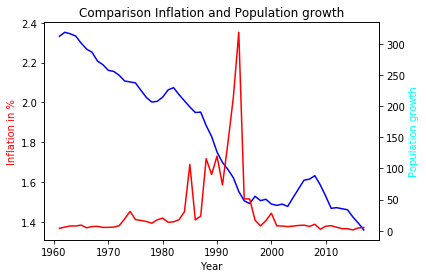

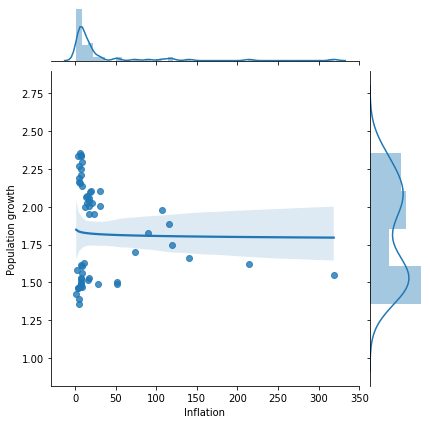

In [47]:
correlation(df_final, df_plgr)

It seems that the highest inflations occured, when the population growth rate decreased fast.
To analyse this correlation, we plot the first derivative of the growth rate agains the time (measure for speed of change). 

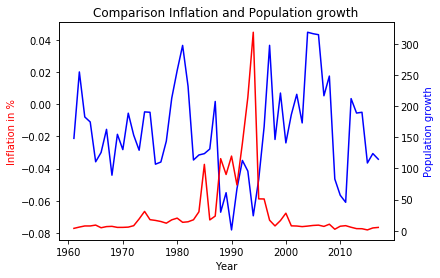

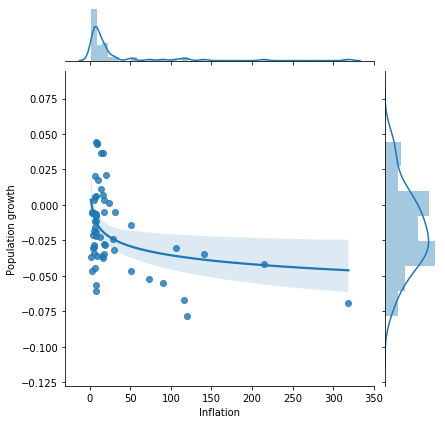

In [43]:
# plotting inflation rate together with derivative if population growth
correlation(df_final, df_plgr.diff())

As assumed, we find a good correlation with a correlation coefficient of **R=-046**. We can conclude that hyperinflations are more likely to occure during times, when the population growth is slowing down too fast.

### b) ... real income?
For this question, we compare the mean income per person with the mean inflation rate.

In [44]:
df_inco = df_final[['year','income_per_person']].dropna()
df_inco = df_inco.groupby('year').mean()
df_inco.head()

,income_per_person
year,
1800-01-01,978.523316
1801-01-01,978.948187
1802-01-01,980.725389
1803-01-01,980.922280
1804-01-01,981.911917


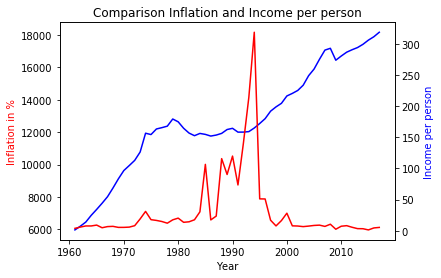

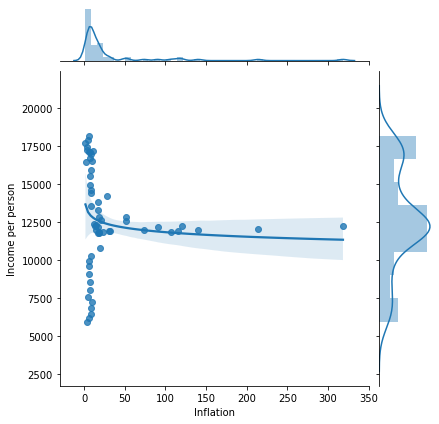

In [45]:
correlation(df_final, df_inco)

The comparison shows, that the mean real income is stagnating in times of high inflation rates.  

### d) ... inequality?
For this question, we compare the mean GINI coefficient, which is a measure to the covial inequality, with the mean inflation rate.

In [175]:
df_gini = df_final[['year','gini']].dropna()
df_gini = df_gini.groupby('year').mean()
df_gini.head()

,gini
year,
1800-01-01,41.411282
1801-01-01,41.411282
1802-01-01,41.411282
1803-01-01,41.411282
1804-01-01,41.411282


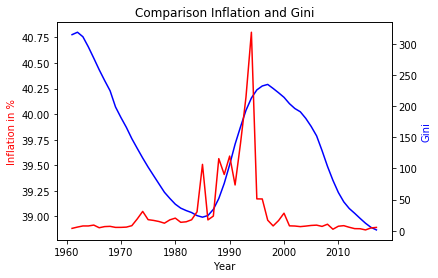

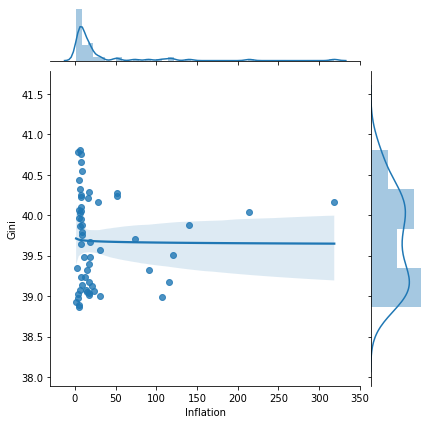

In [176]:
correlation(df_final, df_gini)

The time domain plot shows a clear increase of social inequality in times of high inflations. This is in accordance to the increased rates of unemployment in those phases. 

<a id='results'></a>
## Results

The biggest hyperinflations in different countries and the corresponding reactions of the central bank discount rates during the currency crisis have been identified and analysed. Furthermore, correlations to population growth, real wages, unemployment rate, social inequality, market capitalization and gross domestic investments were investigated.

The biggest hyperinflations from 1961 to 2017 for each country occurred in:

In [ ]:
countries_hyper_html

During most of the inflations, the central bank rose the discount rates to keep up with the inflation and to make lending more money more difficult. Furthermore, there is a global trend to more extreme hyperinflations.

During the last 60 years the world wide population growth has slowed down, with minor increases around 1980s and 2008. It seems that hyperinflations are more likely to occure during times, when the population growth is slowing down too fast. 

The mean real income is stagnating in times of high inflation rates. However, inflation rates are positively correlated with unemplyoment, which means people are more likely to loose their jobs in phases of a currency crisis. This leads also to an increase of social inequality in times of high inflations.